In [5]:
import pandas as pd

# Load the dataset
file_path = 'student_data.csv'
student_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
# student_data.head()

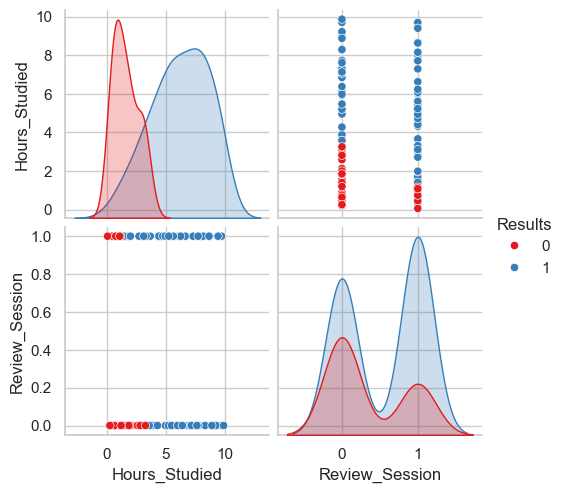

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualization
sns.set(style="whitegrid")

# Create a pairplot to visualize the relationships between variables
sns.pairplot(student_data, hue="Results", palette="Set1", diag_kind='kde')

# Show the plot
plt.show()

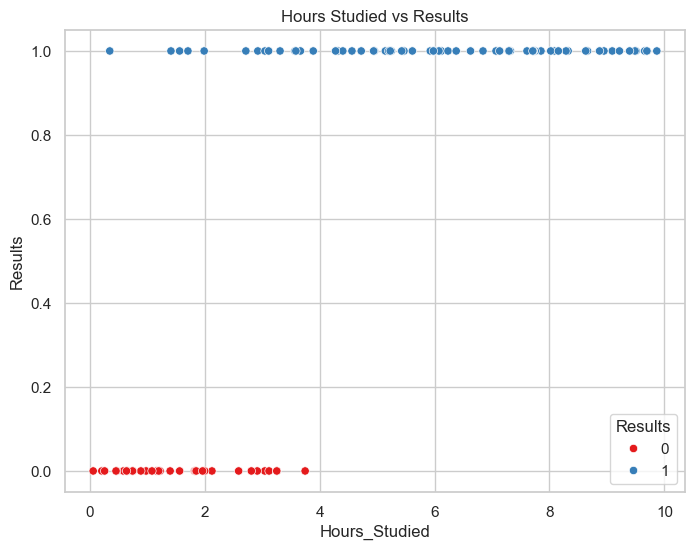

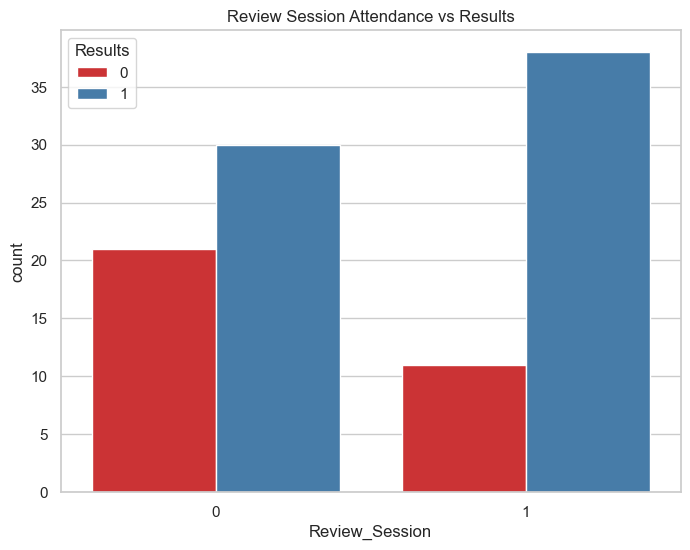

In [11]:
# Plotting relationships between variables and the target 'Results'

# Plot: Hours_Studied vs Results
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours_Studied', y='Results', hue='Results', data=student_data, palette='Set1')
plt.title('Hours Studied vs Results')
plt.show()

# Plot: Review_Session vs Results
plt.figure(figsize=(8,6))
sns.countplot(x='Review_Session', hue='Results', data=student_data, palette='Set1')
plt.title('Review Session Attendance vs Results')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Prepare data for logistic regression
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict the results using the same dataset
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate AUC-ROC
auc = roc_auc_score(y, y_prob)
fpr, tpr, _ = roc_curve(y, y_prob)

# Output model coefficients, accuracy, and AUC
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept, accuracy, auc

(array([[1.36542016, 1.87797591]]),
 array([-4.61373892]),
 0.93,
 0.9761029411764706)

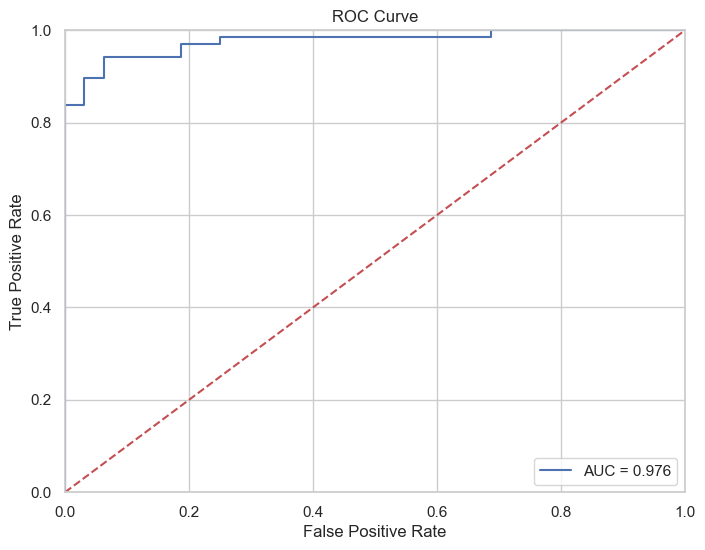

In [15]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}', color='b')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()